In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Loading  Amazon UK product dataset which provides information on product categories,
# brands, prices, ratings, and more from from Amazon UK.
df = pd.read_csv(r"C:\Users\Tijana&Ivan\Desktop\IRON_HACK_PT_DATA_ANALYTICS\Week_13\Labs\archive\amz_uk_price_prediction_dataset.csv")

In [3]:
# Filtering out columns in the dataframe where more than 80% of the values are missing
df = df[df.columns[df.isnull().mean() < 0.8]]

In [4]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [5]:
# Removing the "Id's" columns from the dataframe
df.drop(["uid","asin"], inplace=True, axis=1)

In [6]:
df.head()

,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

""
0
1
2
3
4
...
2443646
2443647
2443648
2443649


In [8]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical
# as categorical variables.
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [9]:
df_categorical

,title,category
0,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
1,"Anker Soundcore mini, Super-Portable Bluetooth...",Hi-Fi Speakers
2,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
3,"Echo Dot with clock (5th generation, 2022 rele...",Hi-Fi Speakers
4,Introducing Echo Pop | Full sound compact Wi-F...,Hi-Fi Speakers
...,...,...
2443646,"Motorbike Armour, Motorbike Clothing, Cycling ...",Motorbike Clothing
2443647,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,Motorbike Clothing
2443648,Men’s Motorcycle Motorbike Biker Trousers Kevl...,Motorbike Clothing
2443649,Texpeed Mens Motorcycle Motorbike Biker Trouse...,Motorbike Clothing


In [10]:
df_numerical

,stars,reviews,price,boughtInLastMonth
0,4.7,15308,21.99,0
1,4.7,98099,23.99,0
2,4.7,15308,21.99,0
3,4.7,7205,31.99,0
4,4.6,1881,17.99,0
...,...,...,...,...
2443646,0.0,0,22.34,0
2443647,0.0,0,97.99,0
2443648,0.0,0,52.99,0
2443649,4.3,404,79.99,0


In [11]:
# Create a crosstab between the product category and the isBestSeller status.
# Generating a crosstab for 'category' and 'isBestSeller'
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result
new_crosstab_result= crosstab_result.copy()

In [12]:
crosstab_result["Total"] = crosstab_result[False]+crosstab_result[True]
crosstab_result["Proportion_BestSellers"] = round(crosstab_result[True]/crosstab_result["Total"],3)
sorted_crosstab= crosstab_result.sort_values(by = "Proportion_BestSellers", ascending= False)
sorted_crosstab

isBestSeller,False,True,Total,Proportion_BestSellers
category,,,,
Health & Personal Care,9017,552,9569,0.058
Grocery,9008,556,9564,0.058
Smart Home Security & Lighting,98,6,104,0.058
Mobile Phone Accessories,248,11,259,0.042
Power & Hand Tools,8353,306,8659,0.035
...,...,...,...,...
Equestrian Sports Boots,2360,1,2361,0.000
Radio Communication,5206,2,5208,0.000
Projectors,8698,0,8698,0.000


Are there categories where being a best-seller is more prevalent?

Health & Personal Care, Grocey and Smart Home Security & Lighting  has the highest proportion of best sellers with approx 5.8%.
Mobile Phone Accessories with 4.8% has also reltively high proportion of best_sellers while, 
for example Equestrian Sports Boots,Radio Communication, Climbing Footwear and many more does not have any best seler proportion indicating that no products from these categories have best seller status.




Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [35]:
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36685.357358582725, 0.0)

A large value of the Chi- statistic suggests a significant association between the variables. 
P-value suggest strong relationship.

In [36]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(new_crosstab_result, method="cramer")

0.1222829439760564

The Cramér's V value of 0.122, suggests a weak association between the variables.
The strenght of this relationship is not very strong in practical terms.

In [37]:
top_5_data = sorted_crosstab.iloc[0:10,:2]
top_5_data

isBestSeller,False,True
category,,
Health & Personal Care,9017,552
Grocery,9008,556
Smart Home Security & Lighting,98,6
Mobile Phone Accessories,248,11
Power & Hand Tools,8353,306
"Billiard, Snooker & Pool",241,8
Pet Supplies,9152,285
Mirrors,243,7
Wind Instruments,243,7


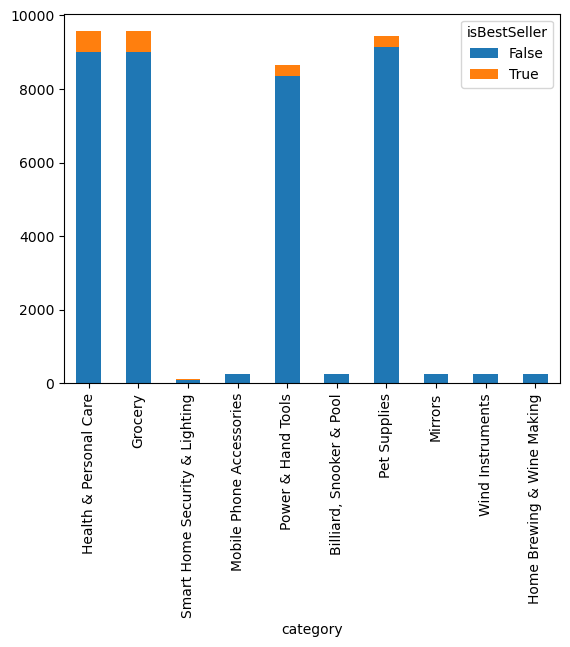

In [16]:
# Plotting a stacked bar chart for the 'crosstab_result' data
top_5_data.plot(kind="bar", stacked=True)
plt.show()

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.



Box Plots:
Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [38]:
df.shape

(2443651, 7)

In [39]:
# calculatin IGR(interquartile_range) of price
quantile_1= df["price"].quantile(0.25)
quantile_3=df["price"].quantile(0.75)
interquartile_range= quantile_3-quantile_1

In [40]:
# finding and removing(filtering) Outliers
q1_outliers= quantile_1 - 1.5 * interquartile_range
q3_outliers= quantile_3 + 1.5 * interquartile_range

filtered_df= df[(df['price'] >= q1_outliers) & (df['price'] <= q3_outliers)]

In [41]:
filtered_df.shape

(2115963, 7)

Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

In [42]:
top_20_categories= filtered_df['category'].value_counts().nlargest(20).index

In [43]:
print("Top 20 Categories:", top_20_categories)

Top 20 Categories: Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Women', 'Fragrances',
       'Handmade Kitchen & Dining', 'Handmade Artwork',
       'Handmade Home & Kitchen Products', 'Handmade Jewellery', 'Men',
       'Baby'],
      dtype='object', name='category')


In [45]:
# Filter the DataFrame
top_categories_df = filtered_df[filtered_df['category'].isin(top_20_categories)]
print("Filtered DataFrame Size:", top_categories_df.shape)  

Filtered DataFrame Size: (1033008, 7)


In [46]:
print("Categories in Filtered DataFrame:", top_categories_df['category'].unique())  

Categories in Filtered DataFrame: ['Handmade Home & Kitchen Products' 'Sports & Outdoors' 'Handmade Gifts'
 'Fragrances' 'Skin Care' 'Birthday Gifts' 'Handmade Kitchen & Dining'
 'Bath & Body' 'Manicure & Pedicure Products' 'Beauty' 'Handmade Artwork'
 'Make-up' 'Baby' 'Handmade Clothing, Shoes & Accessories'
 'Handmade Home Décor' 'Men' 'Luggage and travel gear'
 'Handmade Jewellery' 'Women' 'Hair Care']


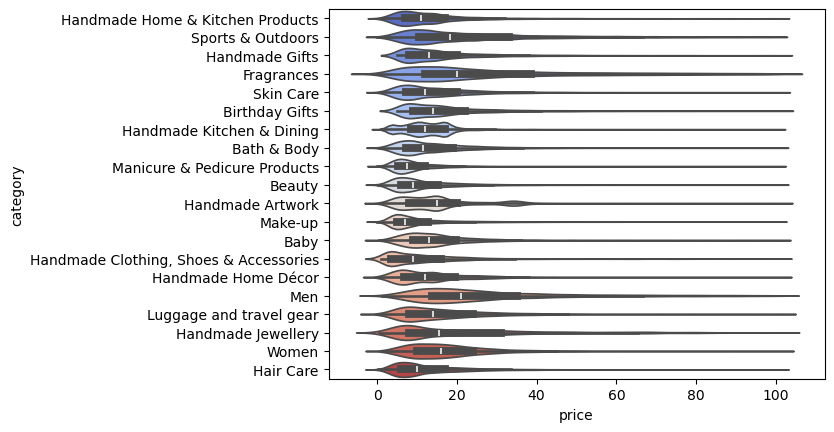

In [47]:
# Plotting a violin plot to visualize the distribution of price across different product categories
sns.violinplot(data=top_categories_df, x='price', y='category', hue = "category", legend = False, palette="coolwarm")
plt.show()

Looking at Violinplot, I would say that category "Men" has the highest median price.

Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.


In [48]:
# Calculating average price per category
average_price= filtered_df.groupby('category')['price'].mean().sort_values(ascending=False)

In [49]:
top10_avg_price=average_price.nlargest(10)
top10_avg_price

category
Motherboards         68.772432
Boxing Shoes         67.417803
Desktop PCs          66.915562
Tablets              66.552971
Graphics Cards       65.103509
Digital Frames       60.745129
Streaming Clients    60.241803
Hockey Shoes         60.094796
Computer Cases       58.339884
Skiing Poles         57.867770
Name: price, dtype: float64

In [29]:
top10_avg_price_df = top10_avg_price.reset_index()
top10_avg_price_df.columns = ['category', 'price']

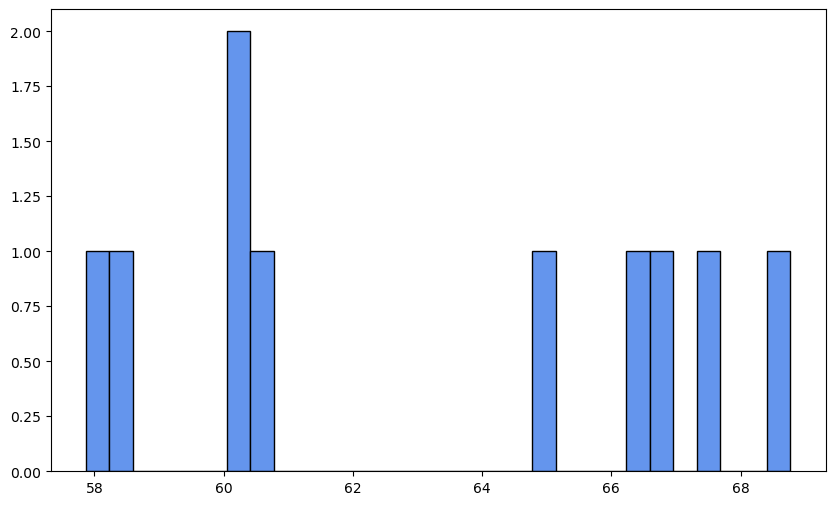

In [30]:
# Plotting a bar plot to visualize the average 'price' for each 'category', using the "coolwarm" color palette
plt.figure(figsize=(10, 6))
plt.hist(top10_avg_price_df['price'], bins=30, color='cornflowerblue', edgecolor='black')
plt.show()

The highest average price comes from Motherboards and it is 68.77

Box Plots:
Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [52]:
top_categories_by_count = df['category'].value_counts().nlargest(10).index
df_top_categories_by_count = df[df['category'].isin(top_categories_by_count)]
df_top_categories_by_count

,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82165,GoPro HERO9 - Waterproof Sports Camera with Fr...,4.5,5161,199.00,True,0,Sports & Outdoors
82166,GoPro HERO10 Black - Waterproof Action Camera ...,4.4,2467,249.99,False,0,Sports & Outdoors
82167,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
...,...,...,...,...,...,...,...
2429088,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


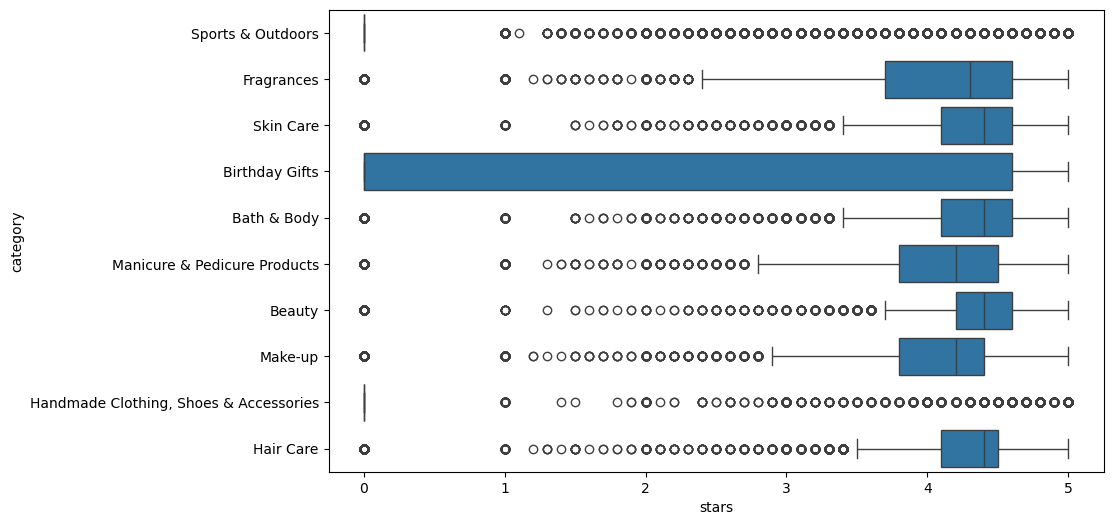

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='category', data=df_top_categories_by_count)
plt.show()

Based on theBox Plot Hair Care, Beauty, Bath&Body and Skin Care have the highest median rating from customers of 4.4

Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

In [57]:
# correlation coefficient between product price and ratings
correlation = filtered_df['price'].corr(filtered_df['stars'])
print(f"Correlation coefficient between price and rating: {correlation}")

Correlation coefficient between price and rating: -0.07767299878178476


-0.0777 indicates small or no correlation between variables.

**Visualisation:**
Scatter plot

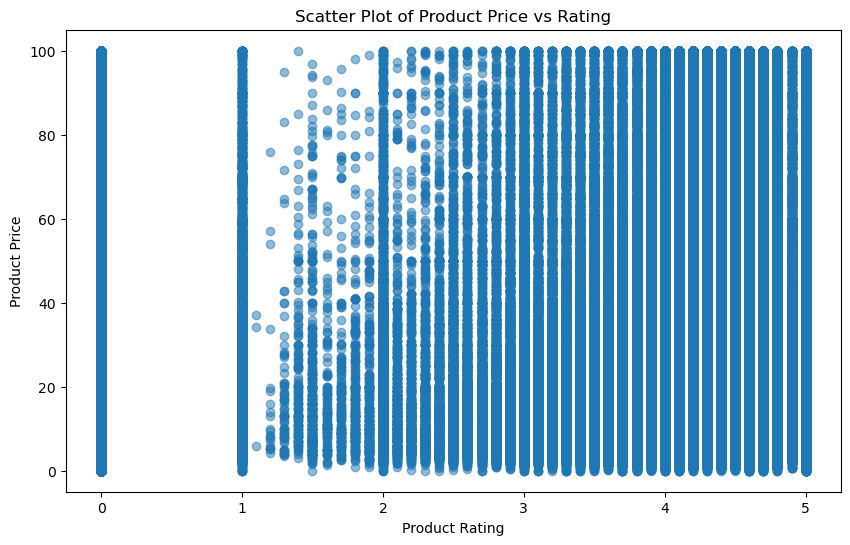

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['stars'], filtered_df['price'], alpha=0.5)
plt.xlabel('Product Rating')
plt.ylabel('Product Price')
plt.title('Scatter Plot of Product Price vs Rating')
plt.show()

There is no trend that shows any correlation between price and rating

**Correlation Heatmap**

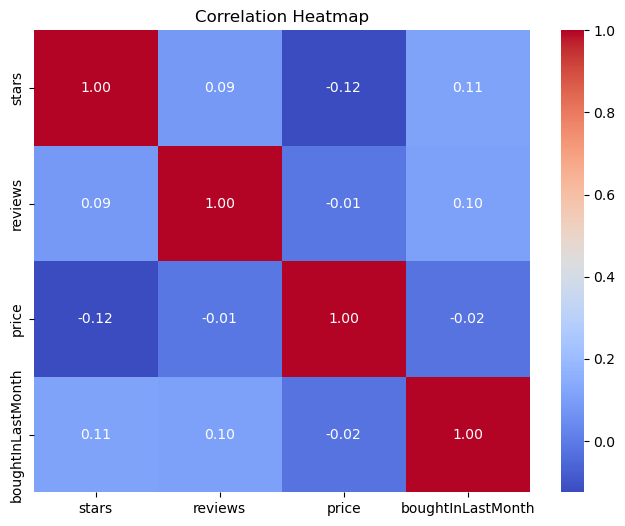

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_numerical.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

 **QQ Plot for Normality Check**

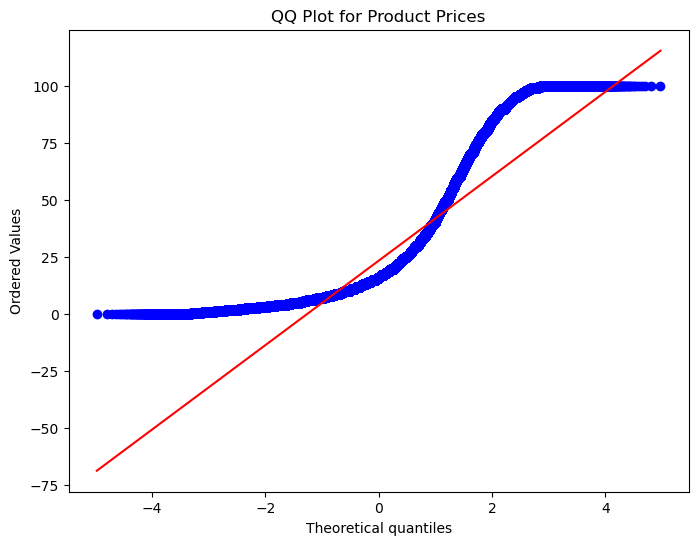

In [60]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(filtered_df['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices')
plt.show()